In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv('IBM.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,78.800003,80.570000,78.190002,80.570000,53.418415,7864500
1,2003-01-03,80.699997,81.650002,80.209999,81.650002,54.134457,5962300
2,2003-01-06,81.900002,84.800003,81.809998,83.589996,55.420681,7921300
3,2003-01-07,83.949997,86.180000,83.750000,86.000000,57.018513,11906900
4,2003-01-08,85.550003,85.690002,84.070000,84.190002,55.818470,9508800


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [206]:
def moving_average(df,column,date_start,date_end,use_weights=False,N=5,verbose=0,decay=0.9):
    date_start = pd.to_datetime(date_start)
    date_end = pd.to_datetime(date_end)
    ground_truth = df[(df['Date']>=date_start) & (df['Date']<=date_end)]
    dates = ground_truth['Date'].astype(str).values
    ground_truth = ground_truth[column]
    if not use_weights:
            weights = np.repeat(1,N)
    elif isinstance(use_weights,list):
            weights = use_weights
    else:
            weights = [decay**i for i in range(N)[::-1]]
    predicted = ground_truth.rolling(window=N).apply(lambda x: np.sum(weights*x) / np.sum(weights), raw=False).values[N-1:]
    ground_truth = ground_truth.values[N-1:]
    
    if verbose:
        error = mean_squared_error(y_true=ground_truth,y_pred=predicted)
        print('MSE : {0}'.format(error))
        plt.figure(figsize=(15,12))
        if use_weights:
            title = 'Weighted moving average on field {0} with decay of : {1}'.format(column,decay)
        else:
            title = 'Moving average on field {0}'.format(column)
        plt.title(title)
        plt.plot(range(len(ground_truth)),ground_truth,'-o')
        plt.plot(range(len(predicted)),predicted,'--o')
        plt.yticks(np.arange(min(ground_truth),max(ground_truth)))
        plt.ylabel('Values')
        plt.xlabel('Date')
        counter = len(predicted)//18
        dates = [dates[i] if i%counter==0  else '' for i in range(0,len(predicted),1) ]
        plt.xticks(range(len(predicted)),dates,rotation=30)
        plt.legend(['Real values','Predicted'])
        
    
    

    

MSE : 0.0133803562600766


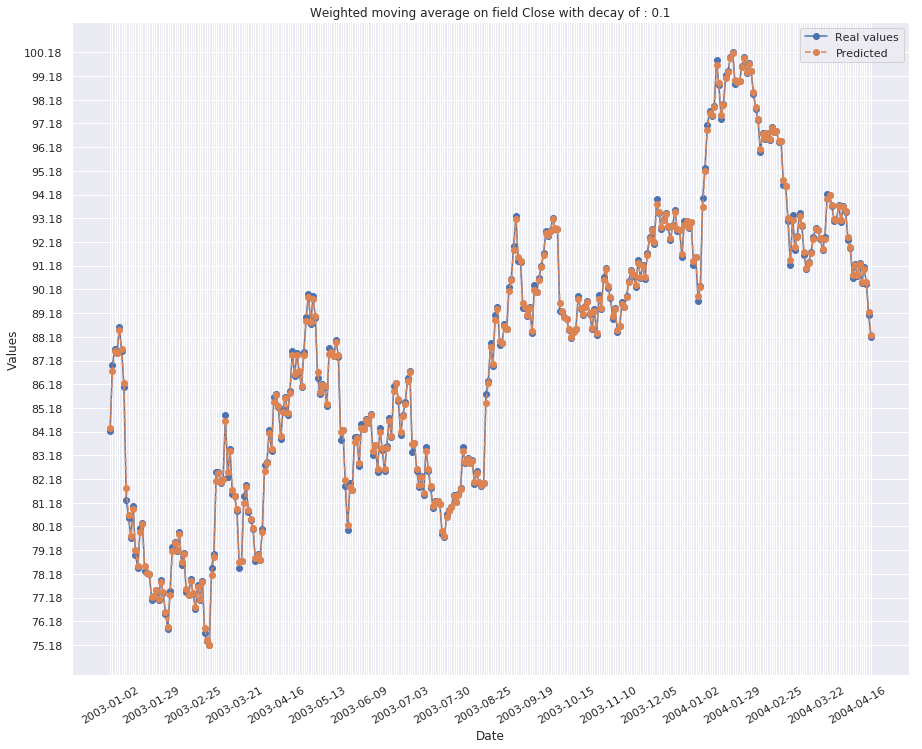

In [207]:
moving_average(df,'Close','2003-01-02','2004-05-02',verbose=1,use_weights=True,decay=0.1,N=5)